In [2]:
import os
from scipy.interpolate import griddata
from netCDF4 import Dataset
import pandas as pd

In [3]:
paracousti_path = "H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\Paracousti_files\Device_Present"
paracousti_files = [os.path.join(paracousti_path, i) for i in os.listdir(paracousti_path) if i.endswith('.nc')]

In [19]:
boundary_conditions = pd.read_csv(r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\DEMO paracousti\Probability\boundary_conditions.csv").set_index('Paracousti File').fillna(0)

In [6]:
for ic, paracousti_file in enumerate(paracousti_files):
    ds = Dataset(paracousti_file)
    spl = ds.variables['totSPL'][:].data
    cords = ds.variables['totSPL'].coordinates.split()
    X = ds.variables[cords[0]][:].data
    Y = ds.variables[cords[1]][:].data
    import numpy as np
    if X.shape[0] != spl.shape[0]:
        spl = np.transpose(spl, (1, 2, 0))
    if ic==0:
        xunits = ds.variables['XCOR'].units
        if 'degrees' in xunits:
            XCOR = np.where(X<0, X+360, X)
        else:
            XCOR = X
        YCOR = Y
        SPL = np.zeros((len(paracousti_files), np.shape(spl)[0], np.shape(spl)[1], np.shape(spl)[2]))
    SPL[ic,:] = spl

In [7]:
SPL_depth_max = np.nanmax(SPL, axis=3)
SPL_depth_max.shape

(14, 120, 119)

C:\Users\local_tnelson76\Temp\ipykernel_49596\2734141228.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])


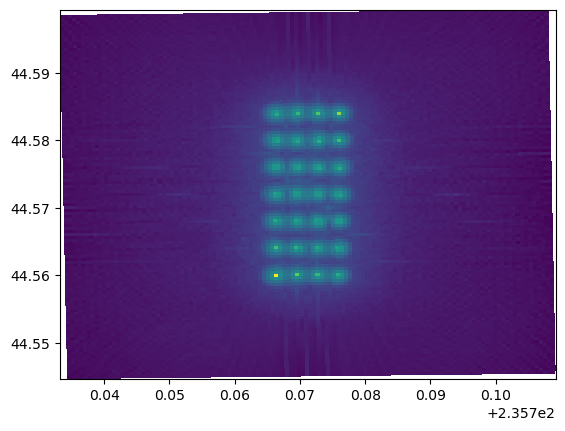

In [8]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])

In [20]:
boundary_conditions

,WhaleWatch File,Probability,Unnamed: 3
Paracousti File,,,
PacWave_3DSPLs_Hw0.5.nc,WhaleWatchPredictions_2021_01.csv,0.00,0.0
PacWave_3DSPLs_Hw1.0.nc,WhaleWatchPredictions_2021_02.csv,2.73,0.0
PacWave_3DSPLs_Hw1.5.nc,WhaleWatchPredictions_2021_03.csv,6.00,0.0
PacWave_3DSPLs_Hw2.0.nc,WhaleWatchPredictions_2021_04.csv,16.00,0.0
PacWave_3DSPLs_Hw2.5.nc,WhaleWatchPredictions_2021_05.csv,10.00,0.0
PacWave_3DSPLs_Hw3.0.nc,WhaleWatchPredictions_2021_06.csv,3.00,0.0
PacWave_3DSPLs_Hw3.5.nc,WhaleWatchPredictions_2021_07.csv,3.50,0.0
PacWave_3DSPLs_Hw4.0.nc,WhaleWatchPredictions_2021_08.csv,4.00,0.0
PacWave_3DSPLs_Hw4.5.nc,WhaleWatchPredictions_2021_09.csv,4.50,0.0


In [18]:
boundary_conditions.columns

Index(['WhaleWatch File', ' Probability ', 'Unnamed: 3'], dtype='object')

In [24]:
boundary_conditions.loc[paracousti_file]['Probability']

0.0

In [25]:
stressor = np.zeros(XCOR.shape)
for ic, file in enumerate(paracousti_files):
    paracousti_file = os.path.basename(file)
    probability = boundary_conditions.loc[paracousti_file]['Probability'] / 100
    stressor = stressor + probability * SPL_depth_max[ic,:]


C:\Users\local_tnelson76\Temp\ipykernel_49596\4240726612.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])


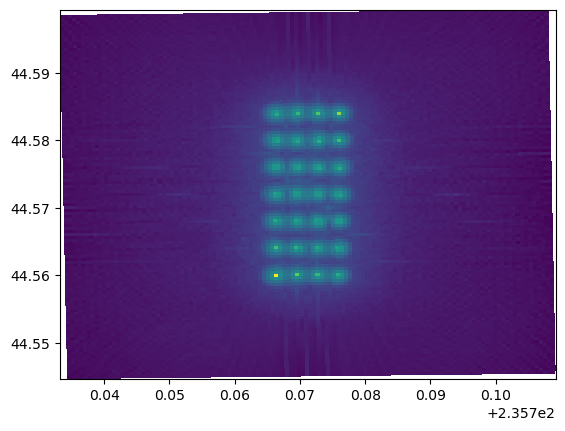

In [28]:
fig,ax = plt.subplots()
ax.pcolormesh(XCOR,YCOR,SPL_depth_max[0,:])

In [ ]:
def create_whale_receptor_array(receptor_filename, x, y, latlon=False):
    # if ((receptor_filename is not None) or (not receptor_filename == "")):
    if not((receptor_filename is None) or (receptor_filename == "")):
        if receptor_filename.endswith('.tif'):
            data = gdal.Open(receptor_filename)
            img = data.GetRasterBand(1)
            receptor_array = img.ReadAsArray()
            receptor_array[receptor_array < 0] = 0
            (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
            cols = data.RasterXSize
            rows = data.RasterYSize
            r_rows = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
            r_cols = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
            if latlon==True:
                r_cols = np.where(r_cols<0, r_cols+360, r_cols)
            x_grid, y_grid = np.meshgrid(r_cols, r_rows)
            receptor_array = griddata((x_grid.flatten(), y_grid.flatten()), receptor_array.flatten(), (x,y), method='nearest', fill_value=0)

        elif receptor_filename.endswith('.csv'):
            receptor_array = pd.read_csv(receptor_filename, header=None, index_col=0).to_numpy().item() * np.ones(x.shape)
        else:
            raise Exception("Invalid Recetpor File Type. Must be of type .tif or .csv")
    else:
        # taucrit without a receptor
        #Assume the following grain sizes and conditions for typical beach sand (Nielsen, 1992 p.108)
        receptor_array = 200*1e-6 * np.ones(x.shape)
    return receptor_array

In [ ]:
for file in paracousti_files:
    paracousti_file = os.path.basename(file)
    whale_file = boundary_conditions.loc[paracousti_file]['WhaleWatch File']
    probability = boundary_conditions.loc[paracousti_file]['WhaleWatch File'] / 100



In [139]:
probability_file

,WhaleWatch File,Probability,Unnamed: 3
Paracousti File,,,
PacWave_3DSPLs_Hw0.5.nc,WhaleWatchPredictions_2021_01.csv,-,NaN
PacWave_3DSPLs_Hw1.0.nc,WhaleWatchPredictions_2021_02.csv,2.73,NaN
PacWave_3DSPLs_Hw1.5.nc,WhaleWatchPredictions_2021_03.csv,6.00,NaN
PacWave_3DSPLs_Hw2.0.nc,WhaleWatchPredictions_2021_04.csv,16.00,NaN
PacWave_3DSPLs_Hw2.5.nc,WhaleWatchPredictions_2021_05.csv,10.00,NaN
PacWave_3DSPLs_Hw3.0.nc,WhaleWatchPredictions_2021_06.csv,3.00,NaN
PacWave_3DSPLs_Hw3.5.nc,WhaleWatchPredictions_2021_07.csv,3.50,NaN
PacWave_3DSPLs_Hw4.0.nc,WhaleWatchPredictions_2021_08.csv,4.00,NaN
PacWave_3DSPLs_Hw4.5.nc,WhaleWatchPredictions_2021_09.csv,4.50,NaN


In [64]:
whale_watch_folder = r'H:\Projects\C1308_SEAT\Acoustics\Output\Whales'
# whale_watch_files = [os.path.join(whale_watch_folder, i) for i in os.listdir(whale_watch_folder) if i.endswith('.csv')]
probability_file[]



In [86]:
df

,Unnamed: 0,longitude,latitude,bathy,bathyrms,sst,chl,ssh,sshrms,month,year,fitmean,sdfit,percent,density,sddens,upper,lower
0,1,225.0,30.00,-4878.50,145.013092,19.304238,0.131974,0.103156,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,225.0,30.25,-4845.25,94.583206,19.198463,0.139409,0.115888,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,225.0,30.50,-4792.00,136.986038,19.137396,0.138623,0.129013,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,225.0,30.75,-4750.00,97.201378,19.051191,0.140509,0.141444,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,225.0,31.00,-4695.00,97.883972,18.915295,0.140971,0.150250,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,6233,245.0,48.00,NaN,NaN,NaN,NaN,NaN,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6233,6234,245.0,48.25,NaN,NaN,NaN,NaN,NaN,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6234,6235,245.0,48.50,NaN,NaN,NaN,NaN,NaN,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6235,6236,245.0,48.75,NaN,NaN,NaN,NaN,NaN,NaN,1,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df = pd.read_csv(os.path.join(whale_watch_folder, probability_file['WhaleWatch File'].values[0])) 
columns_keep = ['latitude', 'longitude', 'percent','density']
df = df[columns_keep]


In [88]:
df

,latitude,longitude,percent,density
0,30.00,225.0,NaN,NaN
1,30.25,225.0,NaN,NaN
2,30.50,225.0,NaN,NaN
3,30.75,225.0,NaN,NaN
4,31.00,225.0,NaN,NaN
...,...,...,...,...
6232,48.00,245.0,NaN,NaN
6233,48.25,245.0,NaN,NaN
6234,48.50,245.0,NaN,NaN
6235,48.75,245.0,NaN,NaN


In [14]:
x = ds.variables['XCOR'][:].data
y = ds.variables['XCOR'][:].data

# create_whale_recepotors()


array([[-124.26538 , -124.264755, -124.26412 , ..., -124.19238 ,
        -124.19176 , -124.191124],
       [-124.26539 , -124.26476 , -124.26413 , ..., -124.19239 ,
        -124.191765, -124.19113 ],
       [-124.2654  , -124.26477 , -124.264145, ..., -124.1924  ,
        -124.19177 , -124.19114 ],
       ...,
       [-124.266525, -124.26589 , -124.26527 , ..., -124.19346 ,
        -124.19283 , -124.1922  ],
       [-124.26653 , -124.2659  , -124.265274, ..., -124.19347 ,
        -124.19284 , -124.19221 ],
       [-124.26654 , -124.265915, -124.26528 , ..., -124.19348 ,
        -124.19285 , -124.192215]], dtype=float32)